In [2]:
%load_ext volr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The volr extension is already loaded. To reload it, use:
  %reload_ext volr


# Volr: A declarative interface language for neural computation

## Experimental neural systems modelling with Jupyter Notebooks

Jens Egholm Pedersen ``<xtp778@alumi.ku.dk>``

## Presentation agenda

1. State of the art behavioural experiments in cognitive neuroscience
2. Volr: A declarative DSL
3. Future work

# Unit for Cognitive Neuroscience

* Founded by prof. Jesper Mogensen in 1980

* Primary research: 
  * Plasticity in the normal brain
  * Functional analysis of the prefrontal, hippocampal, parietal, and basal ganglia systems
  * Traumatic brain injury

## Current research

* Effects of hippocampal lesions on allocentric navigation
* Functional effects of brain injuries
* Neural correlates of consciousness (NCC)

<br/><br/>

## Method of inquiry

<img src="krechevsky.jpg" style="width: 700px; margin-top: -100px; transform: rotate(-90deg)"/>

## Experimental setup

1. Train genetically identical rats
2. Introduce lesion
3. Re-train rats
4. Test hypothesis

* Iteration time in the order of months
* Experiments are hard to reproduce with a low validity

* Why not recreate parts of the experiments in simulations?

## Requirements

* Target audience: cognitive neuropsychologists
  * Background in medicine, psychology and cognitive sciences
* Reproducible experiments
* System introspection
* Fast iteration times
* Biological resemblance
  * Simulation and emulation

## Introducing Volr

<img style="float:right; width: 60%" src="volr_model.png" />

Volr is a declarative domain-specific language for the development, evaluation and analysis of neural systems.

* A DSL for building neural systems
* User interface (Jupyter notebook)
* Experiment target integration
  * Input/output protocols

## Why not use Python and work with the NEST API?

* Easy to make experiments in Python
* Build a wrapper around the NEST API with a simple interface
* They will use Python for the data pre- and post processing anyway

But ...

* Python / NEST API does not scale or port
  * Artificial neural networks or neuromorphic hardware
* Requires complex object-oriented programming:
  * Hard to maintain with the evolution of NEST
  * Requires proficiency in Python

## Volr architecture

We chose to build on top of NEST and PyNN:

* Internal algebraic representation of networks
  * Generated specifications from the targets
  * Compile-time verification
  * Extendible to multiple execution targets
* Haskell base
  * Connection-set algebra
  * Network composition and calculus
* Allows for a simpler 'reasoning'
  * Contributions from linguistics (see <a href="https://julialang.org/blog/2017/12/ml&pl">Innes et al</a>)
* Singular focus: reproducible experiments

## Execution targets

<img style="float:right; width: 60%" src="volr_pipeline.png" />

* Myelin
  * Internal spiking-neural network interpreter
  * NEST through NEST API
  * BrainScaleS through PyNN
* Futhark
  * Data-parallel functional language developed in Copenhagen
  * Accelerated recurrent artificial networks

## Project status

* Currently three supported backends
* Developed in Copenhagen and Heibelberg
* 

## Future work

* Expansion: Tensorflow, Heidelberg chip 2, SpiNNaker
* Improved integration with Jupyter
* 

* Conclusion
  * A working prototype for 2 backends (almost 3) after ~1 week
  * Inclusion of non-expert users
  * Productivity gains, not just for beginners

### Example 1: Graphing a single-population network

Spikes stored in variable `spikes`


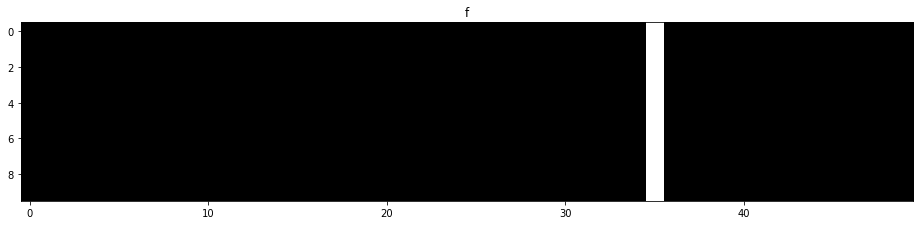

In [3]:
%%volr ssh hel ~/executor.sh 

stimulus s
  input: [20, 21]
        
function f from s excitatory
  neurons: 10
    
response from f excitatory

target nest
   runtime: 50

Spikes stored in variable `spikes`


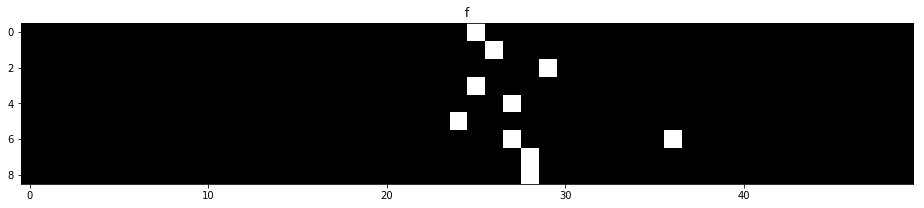

In [18]:
%%volr ssh hel ~/executor.sh wafer

stimulus s
  input: [20, 21]
        
function f from s excitatory
  neurons: 10
    
response from f excitatory

target brainscales
  wafer: 37
  hicann: 297
  runtime: 50

### Example 2: Python integration

In [4]:
stim_spikes = np.random.normal(loc=25, scale=6, size=8)
stim_spikes.sort()
stim_spikes

array([22.39135043, 23.11702577, 23.19889334, 24.68001389, 24.68183817,
       25.12134284, 26.12572315, 35.85689358])

In [1]:
import pandas

In [2]:
import numpy as np

Spikes stored in variable `spikes`


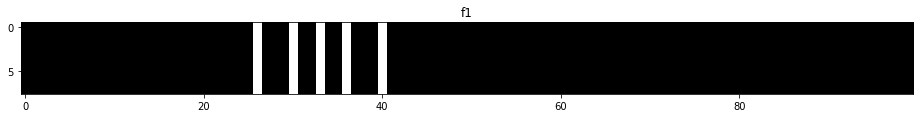

In [6]:
%%volr ssh hel ~/executor.sh

stimulus s
  input: $stim_spikes

function f1 from s excitatory
  weight: 1
  neurons: 8
    
response from f1 excitatory

target nest
  runtime: 100

## Example 3: Excitatory and inhibitory

Spikes stored in variable `spikes`


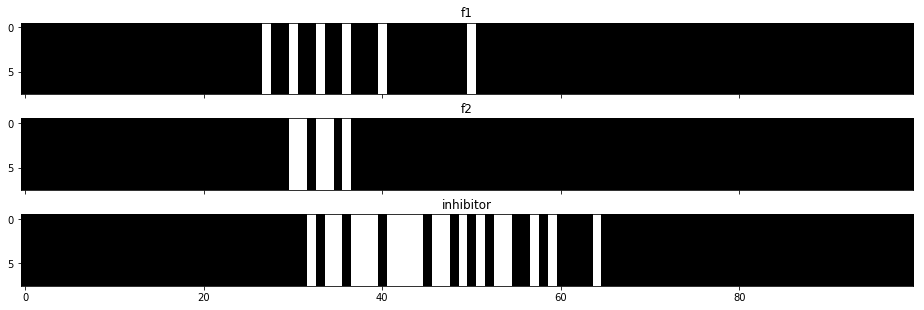

In [9]:
%%volr ssh hel ~/executor.sh

stimulus s
  input: $stim_spikes

function f1 from s excitatory
  neurons: 8
  
function inhibitor 
  from f1 excitatory
    weight: 0.5
  neurons: 8
  
function f2 
  from f1 excitatory
  from inhibitor inhibitory
  neurons: 8

response from f2 excitatory

target nest
  runtime: 100

## Future work and collaboration

* Add learning rules
* Futher integration (DLS, Spikey)
  * Detailed experiments and higher-level concepts
* Future experiments
 * Learning to learn: REF (Mogensen), LSNN (Bellec and Maas), etc.
 * DLS plasticity
* Reproducible regression testing

## Summary

* REF model
* Volr as a DSL for fast and reproducible neuromorphic experiments
* Works needs to be done, but results are promising


Thank you to Mr. Schmitt and Mr. Pehle for the invitation

* Jens Egholm Pedersen: ``jensegholm@protonmail.com``